# Data Analysis and Visualization for Best Books in the 2000's Decade

Our boss from publishing house wants a information about Best Books of 2000s Decade

Our main approach here would be the understanding of which features can affect a book to be on the best books list.

We didn't mention good read web site!




   # 1. Data analysis 

In [2]:
#import liberaries 
import numpy as np 
import pandas as pd
import seaborn as sns
#import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline 

import sweetviz as sv


In [13]:
#opening the data base
df = pd.read_csv('Data.csv')
df = df.drop(['URL'], axis= 1)

In [14]:
df

,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places
0,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959288.0,68446.0,5.0,759.0,2007.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,"[['London, England', '(United Kingdom)'], ['Ho..."
1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6684900.0,175492.0,4.0,374.0,2008.0,1.0,"['Young Adult', 'Fiction', 'Dystopia']",['Locus Award Nominee for Best Young Adult Boo...,"[['District 12, Panem', 'Capitol, Panem', 'Pan..."
2,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575144.0,42015.0,4.0,652.0,2006.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,[['Hogwarts School of Witchcraft and Wizardry'...
3,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2749673.0,49578.0,4.0,734.0,2002.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[['Hogwarts School of Witchcraft and Wizardry,..."
4,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653157.0,45371.0,4.0,870.0,2004.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Bram Stoker Award for Works for Young Reader...,[['Hogwarts School of Witchcraft and Wizardry'...
...,...,...,...,...,...,...,...,...,...,...,...
995,"The Goose Girl (The Books of Bayern, #1)",Neil Gaiman,140021.0,10150.0,4.0,383.0,2005.0,1.0,"['Fantasy', 'Young Adult', 'Fairy Tales']","[""Mythopoeic Fantasy Award Nominee for Childre...",NaN
996,The Complete Calvin and Hobbes,Isabel Allende,36182.0,1048.0,5.0,1456.0,2005.0,1.0,"['Comics', 'Humor', 'Graphic Novels']",[],NaN
997,The Forest of Hands and Teeth (The Forest of H...,Geraldine Brooks,NaN,NaN,4.0,NaN,NaN,NaN,NaN,[],NaN
998,"Finger Lickin' Fifteen (Stephanie Plum, #15)",Rick Riordan,81824.0,4204.0,NaN,308.0,2009.0,1.0,"['Mystery', 'Fiction', 'Humor']",['Goodreads Choice Award Nominee for Mystery/T...,"[['Trenton, New Jersey', '(United States)']]"


In [5]:
df.describe()

,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series
count,9.960000e+02,996.000000,977.000000,993.000000,995.000000,996.000000
mean,1.840673e+05,7862.584337,3.965200,412.090634,2006.047236,0.508032
std,4.331720e+05,13197.642298,0.209451,216.792211,2.637521,0.500187
min,1.500000e+01,0.000000,3.000000,6.000000,1998.000000,0.000000
25%,2.987225e+04,1799.000000,4.000000,301.000000,2004.000000,0.000000
50%,7.136800e+04,3673.000000,4.000000,374.000000,2006.000000,1.000000
75%,1.571198e+05,7992.500000,4.000000,471.000000,2008.000000,1.000000
max,6.684900e+06,175492.000000,5.000000,4100.000000,2018.000000,1.000000


In [6]:
published_year = df['Published Year']
Author = df['Author']

In [34]:
pd.Categorical(df['Genres'])

['['Fantasy', 'Young Adult', 'Fiction']', '['Young Adult', 'Fiction', 'Dystopia']', '['Fantasy', 'Young Adult', 'Fiction']', '['Fantasy', 'Young Adult', 'Fiction']', '['Fantasy', 'Young Adult', 'Fiction']', ..., '['Fantasy', 'Young Adult', 'Fairy Tales']', '['Comics', 'Humor', 'Graphic Novels']', NaN, '['Mystery', 'Fiction', 'Humor']', '['Historical Fiction', 'Fiction', 'Historical']']
Length: 1000
Categories (429, object): ['['Africa', 'Nonfiction', 'Memoir']', '['Biography', 'History', 'Nonfiction']', '['Biography', 'Memoir', 'Nonfiction']', '['Chick Lit', 'Fiction', 'Contemporary']', ..., '['Young Adult', 'Science Fiction', 'Fiction']', '['Young Adult', 'Sports', 'Fiction']', '['Young Adult', 'Vampires', 'Fantasy']', '['Young Adult', 'Vampires', 'Paranormal']']

In [36]:
Author_counts = df['Author'].value_counts()
Author_counts

J.K. Rowling         50
Stephenie Meyer      50
Neil Gaiman          40
Rick Riordan         30
Stieg Larsson        30
                     ..
Eric Schlosser       10
Tatiana de Rosnay    10
Scott Westerfeld     10
Elizabeth Gilbert    10
Elizabeth Kostova    10
Name: Author, Length: 76, dtype: int64

In [38]:
df.groupby['Author']

TypeError: 'method' object is not subscriptable

In [15]:
df['Published Year'].value_counts()


2006.0    203
2007.0    152
2008.0    124
2009.0    115
2004.0     98
2005.0     88
2003.0     71
2002.0     50
2001.0     36
2010.0     18
2000.0     12
2011.0      8
2013.0      4
2012.0      3
2017.0      3
2015.0      3
2016.0      2
2014.0      2
2018.0      1
1998.0      1
1999.0      1
Name: Published Year, dtype: int64

In [8]:
by_year = df.groupby('Published Year')


In [10]:
report = sv.analyze(df)

In [14]:
report.show_html('Best Books of the Decade: 2000s.html')

NameError: name 'report' is not defined

In [47]:
df1 = sv.compare(df, df)
df1.show_html('Compare.html')


Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Exploratory data analysis (EDA)

1. Box plotting numeric data

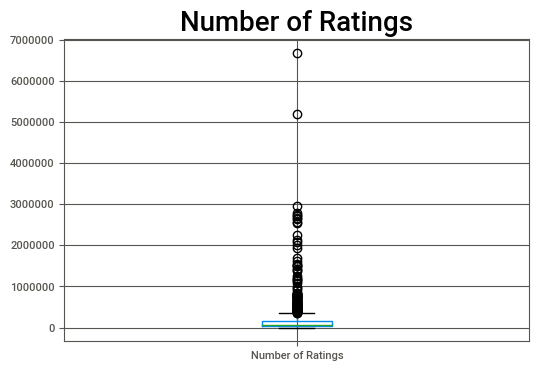

In [27]:
#Number of Ratings
NumbRatings = ['Number of Ratings']

df[NumbRatings].boxplot()
plt.title("Number of Ratings", fontsize=20)
plt.show()

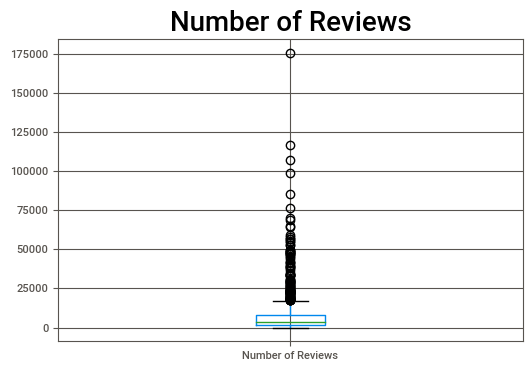

In [28]:
#Number of Reviews
#num_cols = ['Number of Ratings','Number of Reviews','Average Ratings', 'Number of Pages','Published Year','Series']
Numbrev = ['Number of Reviews']
df[Numbrev].boxplot()
plt.title("Number of Reviews", fontsize=20)
plt.show()

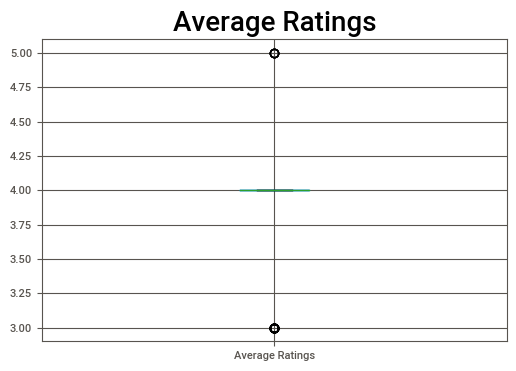

In [29]:
#Average Ratings
Avg_rat = ['Average Ratings']
df[Avg_rat].boxplot()
plt.title("Average Ratings", fontsize=20)
plt.show()

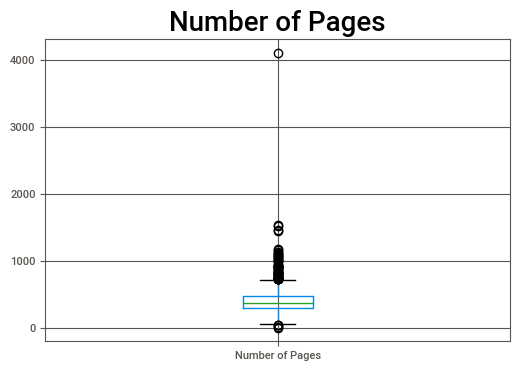

In [30]:
#Number of Pages
numPage = ['Number of Pages']
df[numPage].boxplot()
plt.title("Number of Pages", fontsize=20)
plt.show()

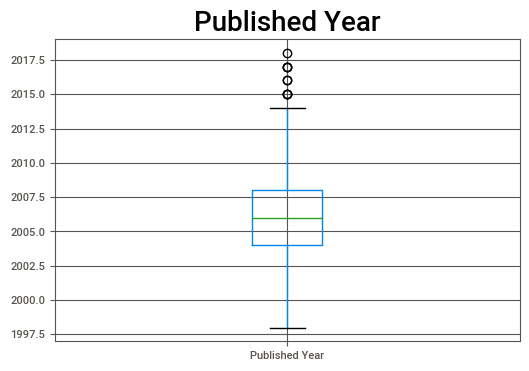

In [31]:
#Published Year
pub= ['Published Year']
df[pub].boxplot()
plt.title("Published Year", fontsize=20)
plt.show()

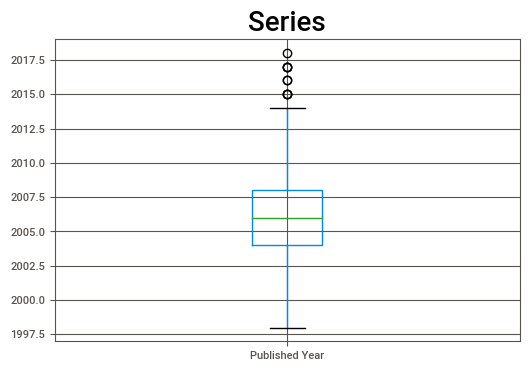

In [32]:
#Series

Series= ['Series']
df[pub].boxplot()
plt.title("Series", fontsize=20)
plt.show()

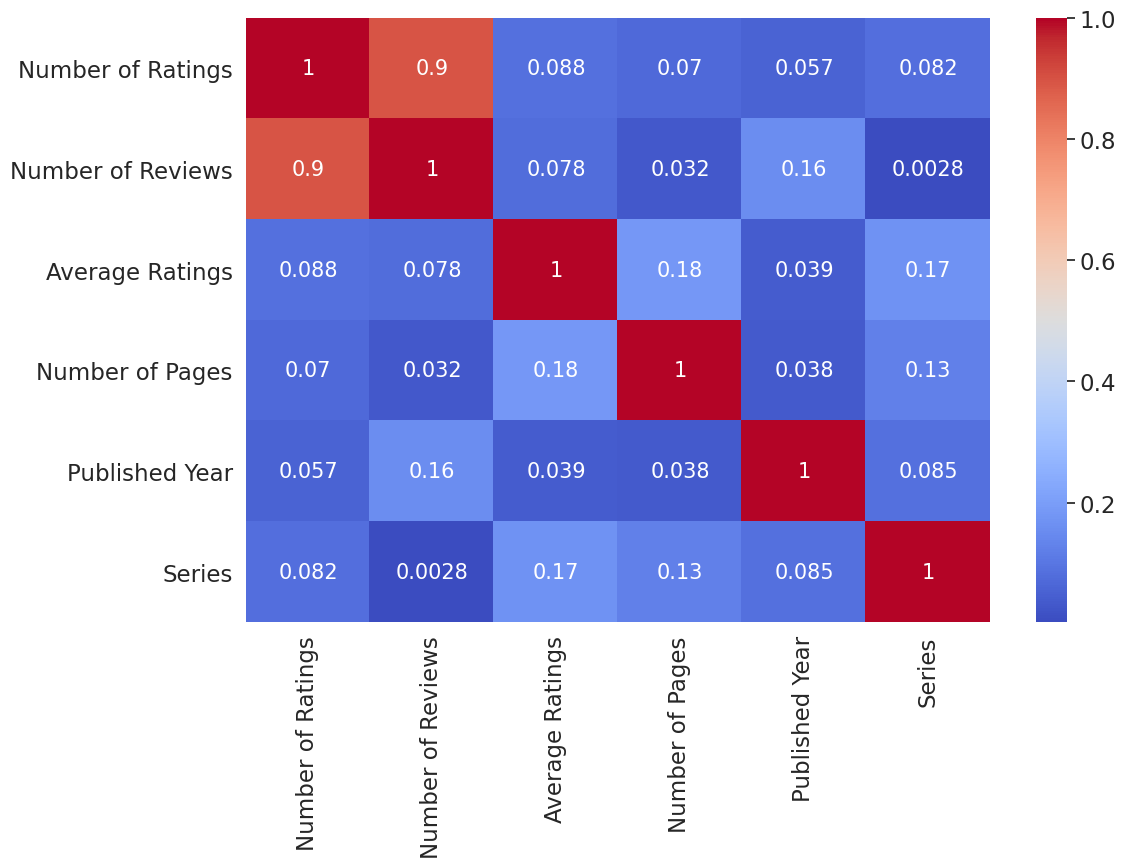

In [33]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.set_style('white')

corr = df.corr()


sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

## Corealtions extracted from the corealtion map 

1. The most significant corelation appears here is the Number of ratting and number of reviews they are opiviousely co-related postively.
2.Average Ratting slightely co realte postively with some other fields like:
    - Number of pages 
    - weather it's a series or not 
    - the published year which just could mean that user is more active through time no more 
    


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0867bd3-5624-476b-af8a-bd1f917bd510' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>